<a href="https://colab.research.google.com/github/mathuchoco/Advanced-Data-Analytics-/blob/master/C4_5_Implementation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

The rise of data quantity in the past decades has led to the search for better techniques and methods to manage and extract data. This is because the previous data analytics and mining methods that were all manual became invalid due its inability to perform at faster rates. The automation of the data analytics field led to the production of various methods, an important one being data classification. Data classification is one of the data mining techniques that organizes data by relevant categories for a more efficient protection and use. This paper implements a popular classification technique, Decision Tree through C4.5 algorithm from scratch.

## Introduction

Decision Tree is a popular for classifying instances by sorting them based on feature values through tree like structures. A decision node has two or more branches and represents a feature in an instance to be classified. Branches open into more branches till it reaches a leaf node, which denotes the classification or the decision. To develop the tree, all the features of the data are evaulated to see which feature provides the best intelligence, with this 'best' feature placed at the top of the tree (also known as ‘Root Node’). As all the features are evaluated to see how much intelligence they add, the tree continues to grow.   
Upcoming sections include ‘Exploration’ which explores through C4.5 data structure and how the classifier was finalised, while ‘Methodology’ describes how we implements the algorithm. ‘Evaluation’ focuses on algorithm execution using a Breast Cancer dataset, as our reference implementation and also describes the algorithm’s performance efficiency analysis. The ‘Ethical’ section looks into the ethical/social aspects of the potential application of the algorithm.
There are various ways to generate a decision tree but the most common algorithms that are used widely are ID3 (Iterative Dichotomer 3), C4.5 and CART (Classification Regression Tree). This paper will implement C4.5 algorithm to generate a decision tree. C4.5 algorithm is an extension of ID3 and is very popular for its quick classification and high precision. C4.5 extends from ID3 through its ability of accomodating for missing values, continuous and discrete attribute ranges, pruning and rule derivation. The algorithm splits the nodes based on highest information gain which is calculated through entropy. The input of the algorithm would be the selected dataset while the output would be the classified instance.


## Exploration

- Talk about the algorithm in detail and how we finalised the steps we ended up taking and the entropy method we ended up using
- Potential challanges and the solutions we came up with (Our binning answer? that's all i know, but i'm pretty sure you guys have more for this)




## Methodology 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

### Learning how to use a decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
learning_dtc = DecisionTreeClassifier(max_features=5, criterion="entropy")
#learning_dtc.fit(x_train, y_train)

### Building the Decision Tree (C4.5) classifier

#### First Step: Calculating Entropy
Entropy is a measure of the impurity in our dataset, calculated one variable at a time. Given any dataset, where our target outcome could be a set of values like Yes/No (arbitrary example of 2 values), the entropy represented by any one feature is given by the formula
E(S) = -P(Yes) * log2(P(Yes)) - P(No) * log2(P(No))

In [0]:
def calculate_entropy(target_column):
  column_elements, column_element_counts = np.unique(target_column, return_counts=True)
  entropy = np.sum([(-column_element_counts[i]/np.sum(column_element_counts))*np.log2(column_element_counts[i]/np.sum(column_element_counts)) for i in range(len(column_elements))])
  return entropy

#### Second Step: Calculating Information Gain
Information gain is a measure of the reduction in entropy, for a specific feature. The goal of using info gain, is to use it across all features and thereby find the feature that gives the highest and then split the current data frame on that.
  Generally information gain is determined using 3 parameters
   1. df = The dataset for whose feature the IG should be calculated
   2. df_feature = the name of the feature for which the information gain should be calculated
   3. target_name = the name of the target feature. we assume default is 'target'


In [0]:
def calculate_info_gain(df, df_feature, target="target"):
  print("calculate weighted entropy for: ", df_feature)
  total_entropy = calculate_entropy(df[target])
  
  #Calculate the values and the corresponding counts for the split attribute being tested 
  column_elements, column_element_counts = np.unique(df[df_feature], return_counts=True)
     
  #Calculate the weighted entropy for the selected feature
  weighted_entropy = np.sum([(column_element_counts[i]/np.sum(column_element_counts))*calculate_entropy(df.where(df[df_feature]==column_elements[i]).dropna()[target]) for i in range(len(column_elements))])
    
  #Calculate the information gain
  info_gain = total_entropy - weighted_entropy
  print("total entropy is : ", total_entropy, ", weighted entropy is:", weighted_entropy, " and info gain is: ", info_gain)

  return info_gain  

#### Building the C4.5 Decision Tree learner
All Data Mining models work by building a learner that builds a model using training data, which is subsequently used with testing data, to generate real predictions. Decision Tree learneres typically use the following parameters
    1. df = the dataframe to classify
    2. df_original = the original dataset 
    3. features = the feature space of the dataset which progressively will reduce as we split the tree on feature(s)
    4. target = the name of the target attribute





In [0]:
def fit(df, df_original, df_features, target = "target", parent = None):    
  print("Entering Classifier")
  print(df.head)
  print("DataFrame columns are: ", df.columns.values)
  print("Features List is: ", df_features)

  # if at this point, the target has only a single value, there is nothing more to classify
  if len(np.unique(df[target])) <= 1:
    print("in #1 where target has only single value")      
    return np.unique(df[target])[0]

  # else if the dataframe is now empty and all features have been classified, there is nothing more to do
  elif len(df) == 0:
    print("in #2 where dataframe to classify, is empty")
    return np.unique(df_original[target])[np.argmax(np.unique(df_original[target], return_counts=True)[1])]

  # else if the list of features to classify, have all been classified, then also there is nothing more to do
  elif len(df_features) == 0:
    print("in #3 where all features have been split on")
    return parent

  # yaay, let's build our tree
  else:
    print("in #4 where tree is continuing to get classified")
    parent = np.unique(df[target])[np.argmax(np.unique(df[target], return_counts=True)[1])]
    print("after finding parent")

    # let's select the feature which best splits the current dataset. To do this, calculate the info gain for each feature and then select the feature
    # with the best gain
    print("about to find best feature")
    feature_info_gains = [calculate_info_gain(df, feature, target) for feature in df_features]
    best_feature_index = np.argmax(feature_info_gains)
    best_feature = df_features[best_feature_index]
    print("best feature is: ", best_feature)

    # let's create a tree structure. At each point, the root is the feature with the best gain
    classifier_tree = {best_feature:{}}
    print("Tree at this point: ", classifier_tree)

    # To recursively classify, from the target dataframe, remove the feature with the best info gain
    df_features = [i for i in df_features if i != best_feature]
    #print(df_features)

    # At this point, we build the decision tree for all values of the new 'branch' node discovered here
    for value in np.unique(df[best_feature]):
      value = value

      # remove all rows with missing data in this node
      # TODO: Ideally C4.5 tries to cater for this
      df_sub = df.where(df[best_feature] == value).dropna()

      # recursively classify each of the sub dataframes
      # Add the sub tree, grown from the sub_dataset to the tree under the root node
      sub_classifier_tree = fit(df_sub, df_original, df_features, target, parent)            
      classifier_tree[best_feature][value] = sub_classifier_tree

    return(classifier_tree)

#### Predicting using the model
Now that the model is ready, in the form of a Learner Tree, we need to predict target for real data. This method expects that the data in the df passed in, does not contain the target

In [0]:
def predict(df, classfier_tree_model, default = 1):
  for key in list(df.keys()):
    print("key is: ", key, " and value is ", df[key])
    if key in list(classfier_tree_model.keys()):
      try:
        result = classfier_tree_model[key][df[key]] 
        print ("result for key: ", key, " is ", result)
      except:
        return default

      result = classfier_tree_model[key][df[key]]

      if isinstance(result, dict):
          return predict(df, result)
      else:
          return result

## Evaluation

For evaluating the C4.5 algorithm, one real world dataset was utilised. This dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. For this dataset, the goal is to classify a breast tumor as benign/malignant. The link to the dataset: 

https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset/downloads/breast-cancer-prediction-dataset.zip/2

As structured below, this whole section targets to test the built algorithm. It will first explore the dataset to identify any additional steps that has to be taken in order to gain successful results. The measure of success for this algorithm are through measuring accuracy, precision, recall, f1-score, support. These measures were implemented from sklearn.metrics. To calculate all these values, a confusion matrix including True positive (TF), True negative(TN), False positive(FP) and False negative(FN) is required. A more in depth explanation on why these particular measures were chosen:

- **Classification Rate/Accuracy:**
Accuracy measures how correct the current prediction was, a necessary measure to categorise and get an indication on the level the model is at. The formula used by accuracy is:

                      (TP + TN) / (TP + TN + FP + FN)

- **Recall:** 
Recall indicates how often it predicts yes and when it is actually yes.  The formula used by Recall is:

                               TP / (TP + FN)

- **Precision:** 
Precision measures when it predicts yes, how often is it correct. The formula used to calculate precision is:

                               TP / (TP + FP)

- **F-measure:**
It is the harmonic mean of both precision and recall. F-measure can be classified as the best measure to use for making decisions as it's main aim is to seek balance between precision and recall. When there is a large number of actual negatives, it leads to an uneven class distrubution and F-measure is efficient to utilise in this aspect. Accuracy in the meantime just focuses mostly on the True Positives while F-measure is more even on both sides. The formula used to calculate F-measure:

                  (2 * Recall * Precision)/(Recall + Presision)

All these measure helps identify the errors produced by the model and improve the algorithm.


### Loading the dataset

In [0]:
"""import the dataset to create DT for"""
from google.colab import files
uploaded = files.upload()

Saving Assignment_2_Breast_Cancer_Dataset.csv to Assignment_2_Breast_Cancer_Dataset (2).csv


### Loading a sample of the dataset

In [0]:
df_breast_cancer = pd.read_csv("Assignment_2_Breast_Cancer_Dataset.csv", delimiter=",")
df_breast_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,6.981,13.43,43.79,143.5,0.11700,1
1,7.691,25.44,48.34,170.4,0.08668,1
2,7.729,25.49,47.98,178.8,0.08098,1
3,7.760,24.54,47.92,181.0,0.05263,1
4,8.196,16.84,51.71,201.9,0.08600,1


In [0]:
#let's look at the shape of our data. how many rows and columns do we have
print(df_breast_cancer.shape)

(569, 6)


In [0]:
# and what our different data types are. For our DT, categorical are best and if its continuous, we are going to have to categorize it
df_breast_cancer.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

### Cleaning Dataset

Decision trees are one of the classifier that don't need a lot of cleaning or pre processing due to its ability of being adherent to missing values and noisy data. C4.5 is known for handling missing values really well. The code below isn't for filling out missing values but rather just checking if there are any:

In [0]:
# null check
df_breast_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

### Understanding our data-set

#### Understanding the target variale

Possible Values of diagnosis and their counts are
malignant    357
benign       212
Name: target, dtype: int64







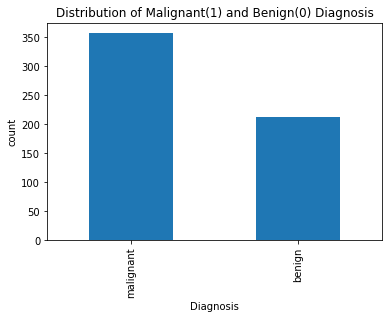

In [0]:
# the 'diagnosis' is what we want to derive, so let's understand that better. And since categorical is better to understand than discrete, we first
# introduce a new column for that
df_breast_cancer['target'] = df_breast_cancer['diagnosis'].map({0:'benign',1:'malignant'}) # converting the data into categorical
target_count = df_breast_cancer.target.value_counts()
print("Possible Values of diagnosis and their counts are")
print(target_count)

print('\n'*4)

target_count.plot(kind='bar')
plt.title("Distribution of Malignant(1) and Benign(0) Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("count");

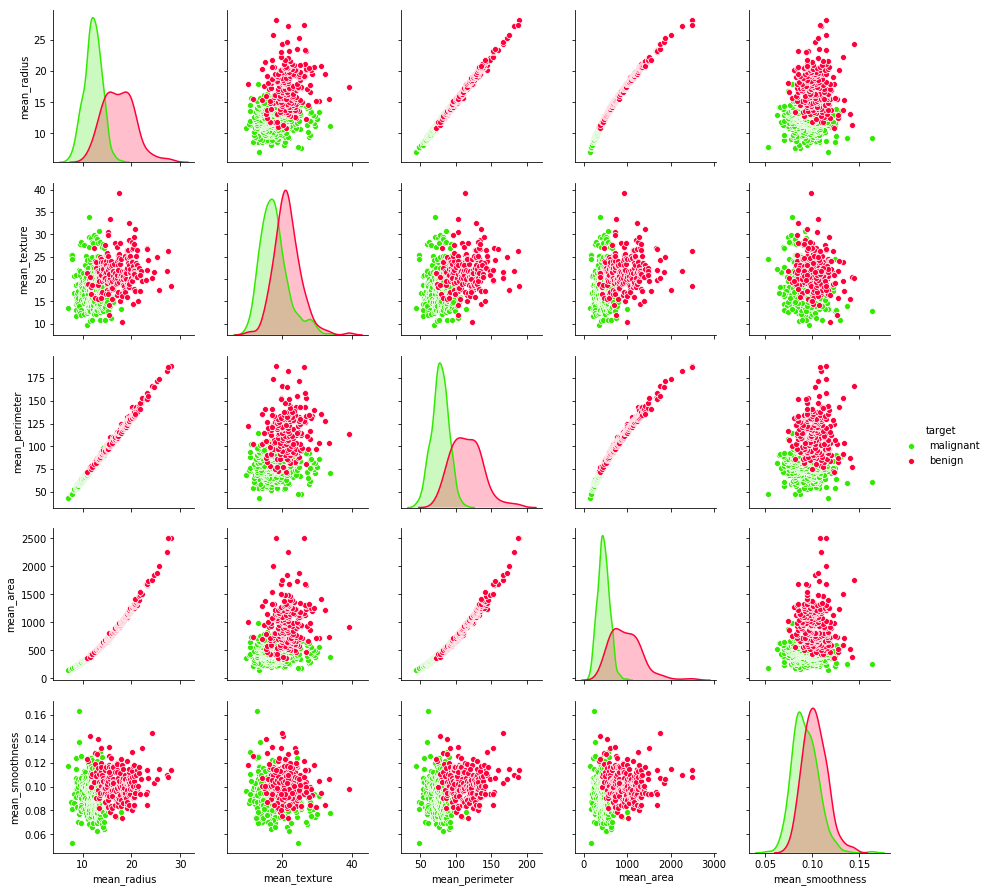

In [0]:
#scatterplot of diagnosis against each of our features
g = sns.pairplot(df_breast_cancer.drop('diagnosis', axis = 1), hue="target", palette='prism');

### Prepare the data - convert continuous to categorical
From the analysis and visualisation of the data above, it is clear that each feature actualy has continuous data which is not the most suitable for creating splits on. These values are therefore converted to categorical data, using binning. The formula used to determine the bin values are: 
                Width = (Maximum – Minimum)/ N 
where N is any number of bin columns used to divide the data equally.

In [0]:
# bin the mean_radius. To continue to use the same feature name, do an in-place replacement
bins = [0, 5, 10, 15, 20, 25, 30]
df_breast_cancer['mean_radius'] = pd.cut(df_breast_cancer['mean_radius'], bins)
print (df_breast_cancer)

# bin the texture. To continue to use the same feature name, do an in-place replacement
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
df_breast_cancer['mean_texture'] = pd.cut(df_breast_cancer['mean_texture'], bins)
print (df_breast_cancer)

# bin the perimeter. To continue to use the same feature name, do an in-place replacement
bins = [0, 25, 50, 75, 100, 125, 150, 175, 200]
df_breast_cancer['mean_perimeter'] = pd.cut(df_breast_cancer['mean_perimeter'], bins)
print (df_breast_cancer)

# bin the mean_area. To continue to use the same feature name, do an in-place replacement
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
#df_breast_cancer['mean_area'] = pd.cut(df_breast_cancer['mean_area'], bins)
print (df_breast_cancer)

# bin the mean_radius. To continue to use the same feature name, do an in-place replacement
bins = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2]
df_breast_cancer['mean_smoothness'] = pd.cut(df_breast_cancer['mean_smoothness'], bins)
print (df_breast_cancer)

    mean_radius  mean_texture  ...  diagnosis     target
0       (5, 10]         13.43  ...          1  malignant
1       (5, 10]         25.44  ...          1  malignant
2       (5, 10]         25.49  ...          1  malignant
3       (5, 10]         24.54  ...          1  malignant
4       (5, 10]         16.84  ...          1  malignant
5       (5, 10]         20.70  ...          1  malignant
6       (5, 10]         18.60  ...          1  malignant
7       (5, 10]         13.10  ...          1  malignant
8       (5, 10]         20.98  ...          1  malignant
9       (5, 10]         11.79  ...          1  malignant
10      (5, 10]         14.45  ...          1  malignant
11      (5, 10]         15.83  ...          1  malignant
12      (5, 10]         16.84  ...          1  malignant
13      (5, 10]         15.49  ...          1  malignant
14      (5, 10]         14.64  ...          1  malignant
15      (5, 10]         18.90  ...          1  malignant
16      (5, 10]         15.76  

In [0]:
# trying something with mean_area
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
df_breast_cancer['mean_area'] = pd.cut(df_breast_cancer['mean_area'], 11, labels=bins)
print (df_breast_cancer)

### Splitting our data into training and testing datasets

In [0]:
# create a target for 'Y' and use the categorical variable created for the diagnosis
y_target = df_breast_cancer['target']
df_breast_cancer_x_features = df_breast_cancer.drop(['diagnosis'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_breast_cancer_x_features.values, y_target.values, test_size=.30)
#x_train
#train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.25)

### Build the Learner Model for our Decision Tree

In [0]:
classifier_tree = fit(x_train, x_train, x_train.columns[:-1])
print(classifier_tree)

Entering Classifier
<bound method NDFrame.head of     mean_radius mean_texture  ... mean_smoothness     target
368    (20, 25]     (15, 20]  ...    (0.075, 0.1]     benign
105    (10, 15]     (15, 20]  ...   (0.125, 0.15]     benign
270    (10, 15]     (15, 20]  ...   (0.05, 0.075]  malignant
150    (10, 15]     (20, 25]  ...    (0.1, 0.125]  malignant
191    (10, 15]     (20, 25]  ...    (0.075, 0.1]  malignant
137    (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
550    (10, 15]     (20, 25]  ...   (0.05, 0.075]  malignant
483    (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
360    (10, 15]     (15, 20]  ...   (0.05, 0.075]  malignant
273     (5, 10]     (15, 20]  ...    (0.075, 0.1]  malignant
90     (10, 15]     (20, 25]  ...    (0.075, 0.1]  malignant
272    (20, 25]     (20, 25]  ...    (0.075, 0.1]     benign
508    (15, 20]     (15, 20]  ...    (0.075, 0.1]  malignant
389    (15, 20]     (20, 25]  ...    (0.1, 0.125]     benign
376    (10, 15]     (20, 25]  ...  

### predict using our decision tree
At long last, we are going to create predictions using our decision tree. To evaluate the quality of our classifier, we will also generate a confusion matrix and check

In [0]:
print(x_test)
predicted_target = predict(x_test, classifier_tree)
print(predicted_target)


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print(predicted_target)
print ('Confusion Matrix :', confusion_matrix(y_test, predicted_target))
print ('Accuracy Score :', accuracy_score(y_test, predicted_target))

    mean_radius mean_texture  ... mean_smoothness     target
443    (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
390    (10, 15]     (10, 15]  ...    (0.075, 0.1]  malignant
45     (15, 20]     (15, 20]  ...    (0.1, 0.125]     benign
565    (20, 25]     (25, 30]  ...    (0.075, 0.1]     benign
180    (25, 30]     (20, 25]  ...    (0.1, 0.125]     benign
42     (15, 20]     (20, 25]  ...    (0.075, 0.1]     benign
161    (15, 20]     (15, 20]  ...    (0.075, 0.1]     benign
117    (10, 15]     (15, 20]  ...    (0.1, 0.125]     benign
526    (10, 15]     (15, 20]  ...    (0.1, 0.125]  malignant
91     (15, 20]     (20, 25]  ...    (0.075, 0.1]     benign
79     (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
159    (10, 15]     (10, 15]  ...    (0.075, 0.1]  malignant
447    (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
158    (10, 15]     (10, 15]  ...    (0.075, 0.1]  malignant
534    (10, 15]     (15, 20]  ...    (0.075, 0.1]  malignant
40     (10, 15]     (20,

TypeError: ignored

## Conclusion
The Decision Tree data mining algorithm is an algorithm that is relatively easy to understand and implement. The real ease comes from the intuitive way in which a decision tree lays out the features, progressing from the feature which gives the most information to the least.
Owing to its popularity decision tree algorithms have a lot of reference implementations that make them easy to understand and adapt. Additionally the fact that good implementations are available, makes it easy to compare the accouracy of our implementation. 

## Ethical 

One of the biggest issues to avoid regardless of what type of programming we are implementing is misuse of code. As C4.5 algorithm is implemented to produce a classifier which deals with datasets that can be sensitive, there are a lot of risks that can be violated if the algorithm is used with ill intentions. Following the Kantian approach on ethics, reasons such as the code being misused in a desperate situation, for ‘personal use’, or that it brung them ‘happiness’ is invalid. No matter what the reason is, if the utilisation of the algorithm passes the line of morality, it will be an immoral act. Potential scenarios of this happening might be:
- Using the algorithm to predict sensitive, private datasets violating privacy.
- Producing an untested/low quality code that could cause potential harm to the users. For example, publishing an untested, unsafe code in the medical industry. This can lead to predicting incorrect outputs which can cause wrong decisions to be made. This can affect a patient’s life permanently.    
- The most common scenario of agreeing to build the algorithm to predict events or contributes to things that can be harmful or potentially bring harm to the society. 

The programmer’s reasons can seem reasonable, for example accidently publishing untested code, forced to take part in the act, running out of time but it is still a violation of ethics as expressed by the Kantian approach and should never be encouraged.  


## Video

In [96]:
"""import the dataset to create DT for"""
from google.colab import files
uploaded = files.upload()

Saving C4.5 Implementation Final.ipynb - Colaboratory - Google Chrome 2019-09-26 00-26-27.mp4 to C4.5 Implementation Final.ipynb - Colaboratory - Google Chrome 2019-09-26 00-26-27.mp4


KeyboardInterrupt: ignored